In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter
import scipy.stats as ss
from sklearn.model_selection import train_test_split

In [2]:
mushrooms_df = pd.read_csv('mushrooms.csv')
mushrooms_df.rename(columns = {"class":"is-edible"}, inplace = True)
mushrooms_df.head()


,is-edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

# Data Preprocessing

## 1. Checking for Null values

In [3]:
def find_missing_values(dataframe):
    """ Find the Number of missing values in each column
    Args:
        dataframe: dataframe of which we need to find no. of missing values in each column
    Return:
        Pandas Dataframe: dataframe with columns and it's respective no. of missing values
    """
    missing_values_dict={'Columns':[],'Number of Missing Values':[]}
    for i in dataframe:
        missing_values_dict['Columns'].append(i)
        missing_values_dict['Number of Missing Values'].append(dataframe[i].isnull().sum())
    return pd.DataFrame(missing_values_dict)

In [4]:
find_missing_values(mushrooms_df)

,Columns,Number of Missing Values
0,is-edible,0
1,cap-shape,0
2,cap-surface,0
3,cap-color,0
4,bruises,0
5,odor,0
6,gill-attachment,0
7,gill-spacing,0
8,gill-size,0
9,gill-color,0


## Conclusion: No Missing values

In [5]:
mushrooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   is-edible                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## 2. Checking if the dataset is Balanced

In [6]:
# series.value_counts return a Series containing counts of unique values.
value_count = mushrooms_df['is-edible'].value_counts()
value_count


e    4208
p    3916
Name: is-edible, dtype: int64

In [7]:
for index,value in value_count.iteritems():
    print(f"{index}:{value/mushrooms_df['is-edible'].count()*100} %")

e:51.7971442639094 %
p:48.20285573609059 %


### 2.1 Visualize 
### Countplot
Countplot is a convenient tool to quickly explore the count of category variables for each unique values. 

<AxesSubplot:xlabel='is-edible', ylabel='count'>

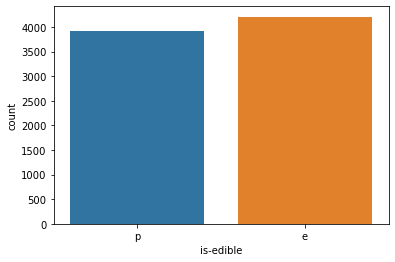

In [8]:
sns.countplot(data = mushrooms_df , x = 'is-edible' )

## Conclusion: Balanced Dataset

## 3. Checking for Redundant data

In [9]:
mushrooms_df.columns

Index(['is-edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
#count only unique value 
#EXAMPLE FOR COUNTING UNIQUE VALUE NOT RELATED TO CODE
idx = pd.Index(['Beagle', 'Pug', 'Labrador', 'Pug',
                        'Mastiff', None, 'Beagle'])
print(idx)
print(idx.nunique(dropna=True))


Index(['Beagle', 'Pug', 'Labrador', 'Pug', 'Mastiff', None, 'Beagle'], dtype='object')
4


In [11]:
mushrooms_df.nunique().sort_values()

veil-type                    1
is-edible                    2
bruises                      2
gill-attachment              2
gill-spacing                 2
gill-size                    2
stalk-shape                  2
ring-number                  3
cap-surface                  4
veil-color                   4
stalk-surface-below-ring     4
stalk-surface-above-ring     4
ring-type                    5
stalk-root                   5
cap-shape                    6
population                   6
habitat                      7
stalk-color-above-ring       9
stalk-color-below-ring       9
odor                         9
spore-print-color            9
cap-color                   10
gill-color                  12
dtype: int64

### 3.1 Dropping constant value column 
veil-type column is dropped as it have constant value of "p" which does not bring any information about the target variable.

In [12]:
mushrooms_df.drop(columns="veil-type", inplace = True)

In [13]:
# mushrooms_df.count()

In [14]:
# data = data[[i for i in mushrooms_df.columns if i not in ('is-edible','odor')]]

In [15]:
# a = np.array(["foo", "foo", "foo", "foo", "bar", "bar",
#               "bar", "bar", "foo", "foo", "foo"], dtype=object)
# b = np.array(["one", "one", "one", "two", "one", "one",
#               "one", "two", "two", "two", "one"], dtype=object)

#              dtype=object)
# pd.crosstab(a, b, rownames=['a'], colnames=['b'],margins=True,margins_name="total")

## Train-Test split

In [16]:
train_df, test_df = train_test_split(mushrooms_df, test_size = 0.3, random_state = 12)
print(train_df.shape)
print(test_df.shape)

(5686, 22)
(2438, 22)


In [17]:
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2))
    chi2 = ss.chi2_contingency(crosstab)[0]
    n = np.sum(crosstab)
    phi2 = chi2/n
    min_ofshape = min(crosstab.shape)-1
#     r,k = crosstab.shape
#     phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
#     rcorr = r - ((r-1)**2)/(n-1)
#     kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2 / min_ofshape)

In [18]:
cramers_values = []
for column in mushrooms_df.columns:
    value = cramers_V(mushrooms_df['is-edible'], test_df[column])
    cramers_values.append(round(value,2))

    
cramers_results = np.array(cramers_values)
cramers_V_matrix = pd.DataFrame(cramers_values,columns = ['is-edible'] ,index = mushrooms_df.columns)

In [19]:
cramers_V_matrix[['is-edible']].sort_values('is-edible')

,is-edible
stalk-shape,0.09
gill-attachment,0.14
veil-color,0.16
cap-surface,0.20
cap-color,0.22
ring-number,0.22
cap-shape,0.25
gill-spacing,0.35
stalk-root,0.40
habitat,0.45


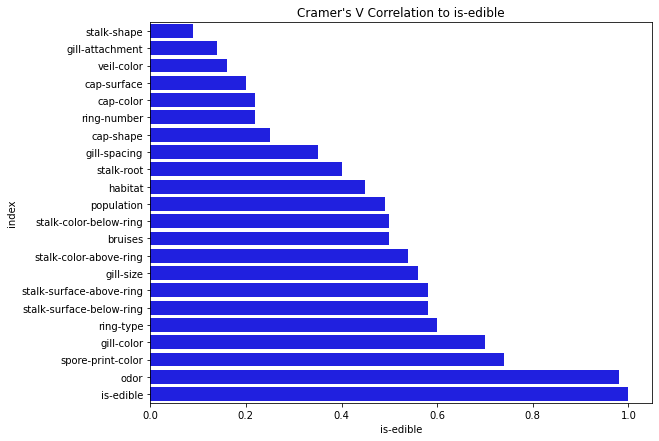

In [20]:
fig, ax = plt.subplots(figsize = (9,7))
sns.barplot(y="index", x="is-edible", data = cramers_V_matrix[['is-edible']].sort_values('is-edible').reset_index(), color = "blue")
plt.title("Cramer's V Correlation to is-edible")
plt.show()

In [21]:
mushrooms_df.shape

(8124, 22)

From the Cramer's V statistical test, the following are the observations:

1. Odor seems to be a strong measure as the association between odor with the target variable, is-edible is very high.
2. There seems to be little association between `['stalk-shape', 'gill-attachment', 'veil-color', 'cap-surface', 'ring-number', 'cap-color', 'cap-shape']` with target variable, `"is-edible"`.
       
    This might be due to the present of some minority classes(values with little observation) or there are simply no association.

To test out the hypothesis above, we print out the contingency table for features with low Cremer's V score and perform some basic visualisation

In [22]:
cols = ['stalk-shape', 'gill-attachment', 'veil-color', 'cap-surface', 'ring-number', 'cap-color', 'cap-shape']
for col in cols:
    display(pd.crosstab(train_df['is-edible'], train_df[col],margins=True,margins_name="total"))

stalk-shape,e,t,total
is-edible,,,
e,1134,1829,2963
p,1335,1388,2723
total,2469,3217,5686


gill-attachment,a,f,total
is-edible,,,
e,129,2834,2963
p,14,2709,2723
total,143,5543,5686


veil-color,n,o,w,y,total
is-edible,,,,,
e,64,65,2834,0,2963
p,0,0,2718,5,2723
total,64,65,5552,5,5686


cap-surface,f,g,s,y,total
is-edible,,,,,
e,1096,0,798,1069,2963
p,533,3,976,1211,2723
total,1629,3,1774,2280,5686


ring-number,n,o,t,total
is-edible,,,,
e,0,2598,365,2963
p,28,2643,52,2723
total,28,5241,417,5686


cap-color,b,c,e,g,n,p,r,u,w,y,total
is-edible,,,,,,,,,,,
e,37,22,445,737,851,36,11,11,521,292,2963
p,91,10,594,547,709,59,0,0,224,489,2723
total,128,32,1039,1284,1560,95,11,11,745,781,5686


cap-shape,b,c,f,k,s,x,total
is-edible,,,,,,,
e,288,0,1111,163,19,1382,2963
p,33,3,1093,415,0,1179,2723
total,321,3,2204,578,19,2561,5686


By analysing the printed cross-tab the following are the observations:

1. For the features that are flagged as weak association to the target variable, some of the values seems to be a strong split and can make up a strong feature once One-Hot Encoded (e.g. gill-attachment, veil-color, ring-number, cap-shape)
2. However, there are also features where all the values are ambiguous in classifying the target variable.(e.g. stalk-shape, cap-surface) Although there might be some hidden relationship when we take account of combination for more than one features, we first attempt to **drop `["stalk-shape", "cap-surface"]` features** from our dataset and revisit the decision after modelling.

In [23]:
mushrooms_df.drop(columns = ["stalk-shape", "cap-surface"], inplace = True)


In [24]:
mushrooms_df.shape

(8124, 20)

## 4. Splitting Dataset

In [25]:
s = ['a','b','c','d']
dum = pd.get_dummies(s,drop_first=True)
dum

,b,c,d
0,0,0,0
1,1,0,0
2,0,1,0
3,0,0,1


In [26]:
train_df.shape, test_df.shape

((5686, 22), (2438, 22))

## 5. Feature Encoding (Dummies Encoding + One-Hot Encoding)
For starter, we will perform one-hot encoding for Nominal Categorical Columns(>2 Unique Values) to encode our features and target variable into values of 0 and 1.
Dummies Encoding is then used to encode Binary Columns(Unique Values = 2) with `drop=first` flag to avoid high correlation between encoded features

In [27]:
binary_col = train_df.columns[train_df.nunique() == 2]
categorical_col = [col for col in train_df.columns if col not in binary_col]

dummy_encode_train = pd.get_dummies(train_df[binary_col], drop_first= True, prefix_sep="-") #dummy encode for binary features
onehot_encode_train = pd.get_dummies(train_df[categorical_col], drop_first= False, prefix_sep="-") #onehot encode for categorical features

dummy_encode_test = pd.get_dummies(test_df[binary_col], drop_first= True, prefix_sep="-") #dummy encode for binary features
onehot_encode_test = pd.get_dummies(test_df[categorical_col], drop_first= False, prefix_sep="-") #onehot encode for categorical features

train_onehot = pd.concat([dummy_encode_train, onehot_encode_train], axis = 1)
test_onehot = pd.concat([dummy_encode_test, onehot_encode_test], axis = 1)

display(train_onehot)
display(test_onehot)

,is-edible-p,bruises-t,gill-attachment-f,gill-spacing-w,gill-size-n,stalk-shape-t,cap-shape-b,cap-shape-c,cap-shape-f,cap-shape-k,...,population-s,population-v,population-y,habitat-d,habitat-g,habitat-l,habitat-m,habitat-p,habitat-u,habitat-w
3366,1,0,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
7200,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5898,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7236,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5655,1,1,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,1,0,1,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3325,0,1,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1414,0,0,1,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5787,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


,is-edible-p,bruises-t,gill-attachment-f,gill-spacing-w,gill-size-n,stalk-shape-t,cap-shape-b,cap-shape-c,cap-shape-f,cap-shape-k,...,population-s,population-v,population-y,habitat-d,habitat-g,habitat-l,habitat-m,habitat-p,habitat-u,habitat-w
61,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2366,0,1,1,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5161,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
7582,1,0,1,0,1,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
6932,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,0,1,1,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
583,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6073,1,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2024,0,1,1,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


## Splitting Features and Target Variable
After one-hot encoding, we split our training and testing set into X_train, X_test, y_train, y_test.

In [28]:
X_train, y_train = train_onehot.drop(columns = 'is-edible-p'), train_onehot['is-edible-p']
X_test, y_test = test_onehot.drop(columns = 'is-edible-p'), test_onehot['is-edible-p']
display(X_train)
display(X_test)

,bruises-t,gill-attachment-f,gill-spacing-w,gill-size-n,stalk-shape-t,cap-shape-b,cap-shape-c,cap-shape-f,cap-shape-k,cap-shape-s,...,population-s,population-v,population-y,habitat-d,habitat-g,habitat-l,habitat-m,habitat-p,habitat-u,habitat-w
3366,0,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
7200,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5898,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7236,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5655,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,0,1,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3325,1,1,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1414,0,1,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5787,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


,bruises-t,gill-attachment-f,gill-spacing-w,gill-size-n,stalk-shape-t,cap-shape-b,cap-shape-c,cap-shape-f,cap-shape-k,cap-shape-s,...,population-s,population-v,population-y,habitat-d,habitat-g,habitat-l,habitat-m,habitat-p,habitat-u,habitat-w
61,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2366,1,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5161,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
7582,0,1,0,1,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
6932,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,1,1,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
583,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6073,0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2024,1,1,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


## Recursive Feature Elimination


In [29]:
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn.tree._export import plot_tree
# from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, auc, roc_curve

As we have 101 features after feature encoding, to get a simpler model, we make use of Recursive Feature Elimination with Support Vector Machine running linear kernel to perform feature selection for us by ranking the features by the score generated by LinearSVM which can find the best linear split with maximum margin, which might be helpful for us in the case of Binary Classification.

After running the feature selection process, rfe reduced the number of features recommended into just 10 features, which we will be using the selected features for modelling later on.

In [49]:
from sklearn.svm import SVC  #SVC better for binary classification than rfc
from sklearn.feature_selection import RFECV
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


Optimal number of features : 10


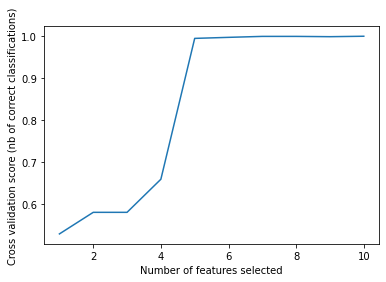

In [42]:
svm = SVC(kernel='linear') #LinearSVC
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svm, step=1, cv=5,
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X_train, y_train) 

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [43]:
X_train = X_train.loc[:,rfecv.ranking_==1]
X_test = X_test.loc[:,rfecv.ranking_==1]
print(X_train.shape)
print(X_test.shape)


(5686, 10)
(2438, 10)


# Modeling

After we have performed feature selection to limit down the number of features from 107 features to just 10 features, we are ready to make use of some sklearn model to see whether can we find some simple yet interpretable model that can help us classify whether is a mushroom poisonous.

We will first begin by exploring several simple statistical model with default parameters and make decision based on the evaluation outcome and also the interpretability

## Baseline Classifier
We use Dummy Classifier by predicting the most dominant classes : Poisonous = False and evaluate the score of the baseline predictor as reference point for model selection.

In [44]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
print("Baseline Accuracy Score :{:.4f}".format(dummy.score(X_test, y_test)))

Baseline Accuracy Score :0.5107


# Model Selection

In [88]:
# Defining Utility Function 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
def evaluate_model(models, X_train, X_test, y_train, y_test):
    hist = {}
    n_models = len(models)
    fig, axes = plt.subplots(1 + n_models // 4 ,4, figsize = (4*4, 2 + 4*(n_models//4)))
    
    for idx, model in tqdm(enumerate(models)):
        try:
            clf = model(random_state=13) # Setting random_state for certain model
        except:
            clf = model()
        clf.fit(X_train, y_train)
        yhat_train = clf.predict(X_train)
        acc_train = accuracy_score(y_train, yhat_train)
        f1_train = f1_score(y_train, yhat_train)
        
        # 5-Fold CV
        cv_hist = cross_validate(clf, X_train, y_train, scoring=['accuracy', 'f1', 'roc_auc'])

        # Record down the performance
        hist[model.__name__] = dict(
            train_acc = acc_train,
            cv_acc = cv_hist['test_accuracy'].mean(),
            train_f1_score = f1_train,
            cv_f1_score = cv_hist['test_f1'].mean(),
            cv_auc = cv_hist['test_roc_auc'].mean()
        )

        # Plotting AUC ROC Curve with Test Set *Without taking any reference for Model Selection
#         plot_roc_curve(clf, X = X_test, y = y_test, ax=axes[idx//4,idx%4])
       
#     plt.tight_layout()
    display(pd.DataFrame(hist).T)
#     plt.show()

5it [00:06,  1.26s/it]


,train_acc,cv_acc,train_f1_score,cv_f1_score,cv_auc
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.0
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.0
LogisticRegression,0.998945,0.998242,0.998897,0.998158,1.0
LinearSVC,1.000000,1.000000,1.000000,1.000000,1.0
KNeighborsClassifier,1.000000,0.999297,1.000000,0.999263,1.0


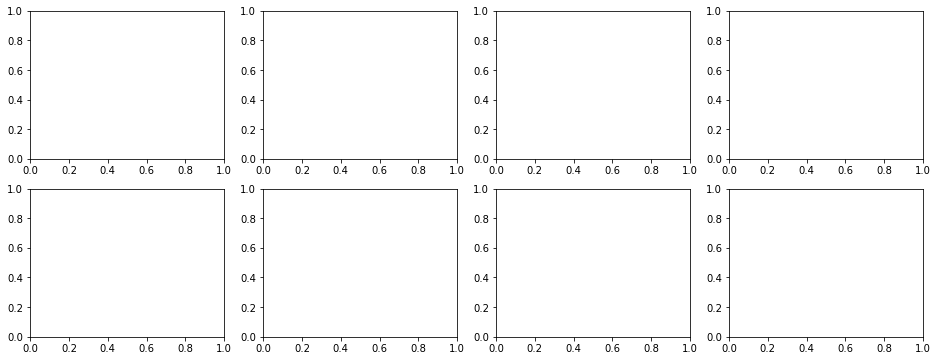

In [89]:
models = [DecisionTreeClassifier, RandomForestClassifier,LogisticRegression, LinearSVC, KNeighborsClassifier]
evaluate_model(models, X_train, X_test, y_train, y_test)

## Model Evaluation : KNeighborsClassifier

In [73]:
scores = []
k_range = range(1,10)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    yhat = knn.predict(X_test)
    hist = cross_validate(knn,X_train,y_train,cv=5)
    acc = accuracy_score(y_test, yhat)
    scores.append(acc)
   
    print("Cross Validation Score:", pd.DataFrame(hist)[["test_score"]].describe().T[["mean","std"]], sep="\n")
    print("Test Set Accuracy Score: {:.4f}".format(acc))

Cross Validation Score:
            mean  std
test_score   1.0  0.0
Test Set Accuracy Score: 1.0000
Cross Validation Score:
                mean       std
test_score  0.999297  0.001572
Test Set Accuracy Score: 1.0000
Cross Validation Score:
                mean       std
test_score  0.999297  0.001572
Test Set Accuracy Score: 1.0000
Cross Validation Score:
                mean       std
test_score  0.999297  0.001572
Test Set Accuracy Score: 1.0000
Cross Validation Score:
                mean       std
test_score  0.999297  0.001572
Test Set Accuracy Score: 1.0000
Cross Validation Score:
                mean       std
test_score  0.999297  0.001572
Test Set Accuracy Score: 1.0000
Cross Validation Score:
                mean       std
test_score  0.999297  0.001572
Test Set Accuracy Score: 1.0000
Cross Validation Score:
                mean       std
test_score  0.998418  0.002188
Test Set Accuracy Score: 1.0000
Cross Validation Score:
                mean       std
test_score  0.99859

Text(0, 0.5, 'Testing Accuracy')

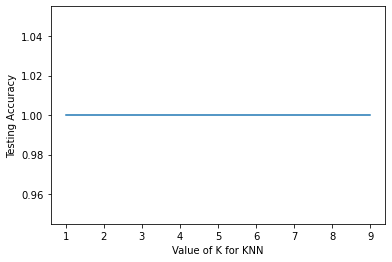

In [74]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Confusion Matrix

Confusion Matrix for DecisionTreeClassifier


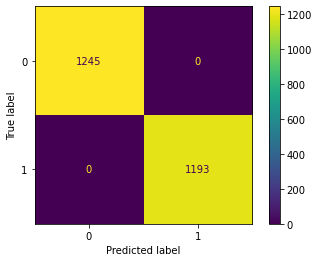

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


final_model = DecisionTreeClassifier(max_depth= 5, max_features= None,random_state=12)
final_model.fit(X_train, y_train)
predictions = final_model.predict(X_test)
cm_dtc = confusion_matrix(y_test, predictions)
print("Confusion Matrix for DecisionTreeClassifier")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtc,
                             display_labels=final_model.classes_)

disp.plot();



# Model Intepretation
By using the best parameters generated from Grid Search Cross-validation, we train our final model and gain some insights by visualising the decision rule of the decision tree.

In [81]:
final_model = DecisionTreeClassifier(max_depth= 5, max_features= None,random_state=12)
final_model.fit(X_train, y_train)
print("Test Accuracy Score : {:.4f}".format(final_model.score(X_test,y_test)))

Test Accuracy Score : 1.0000


## Feature Importance
From the feature importance we can tell that out of the 10 selected features, only 8 of them are used in the decision rule and odor-n which represents No-odor, is the best-feature with highest feature importance.

Meanwhile, "Black Stalk Surface Above Ring, Woods Habitat" is not utilise based on the decision rule.

Hence, we can conclude that by using only 8 true or false values, we can effectively classify whether is a mushroom poisonous or edible.

In [76]:
pd.DataFrame(list(zip(X_train.columns, final_model.feature_importances_)), 
             columns = ['features', 'importance']).sort_values('importance', ascending = False)

,features,importance
4,odor-n,0.603448
0,bruises-t,0.173272
3,odor-l,0.115818
2,odor-a,0.046346
7,spore-print-color-r,0.034758
6,stalk-surface-below-ring-y,0.015991
1,gill-size-n,0.006322
8,population-c,0.004046
5,stalk-surface-above-ring-k,0.000000
9,habitat-w,0.000000


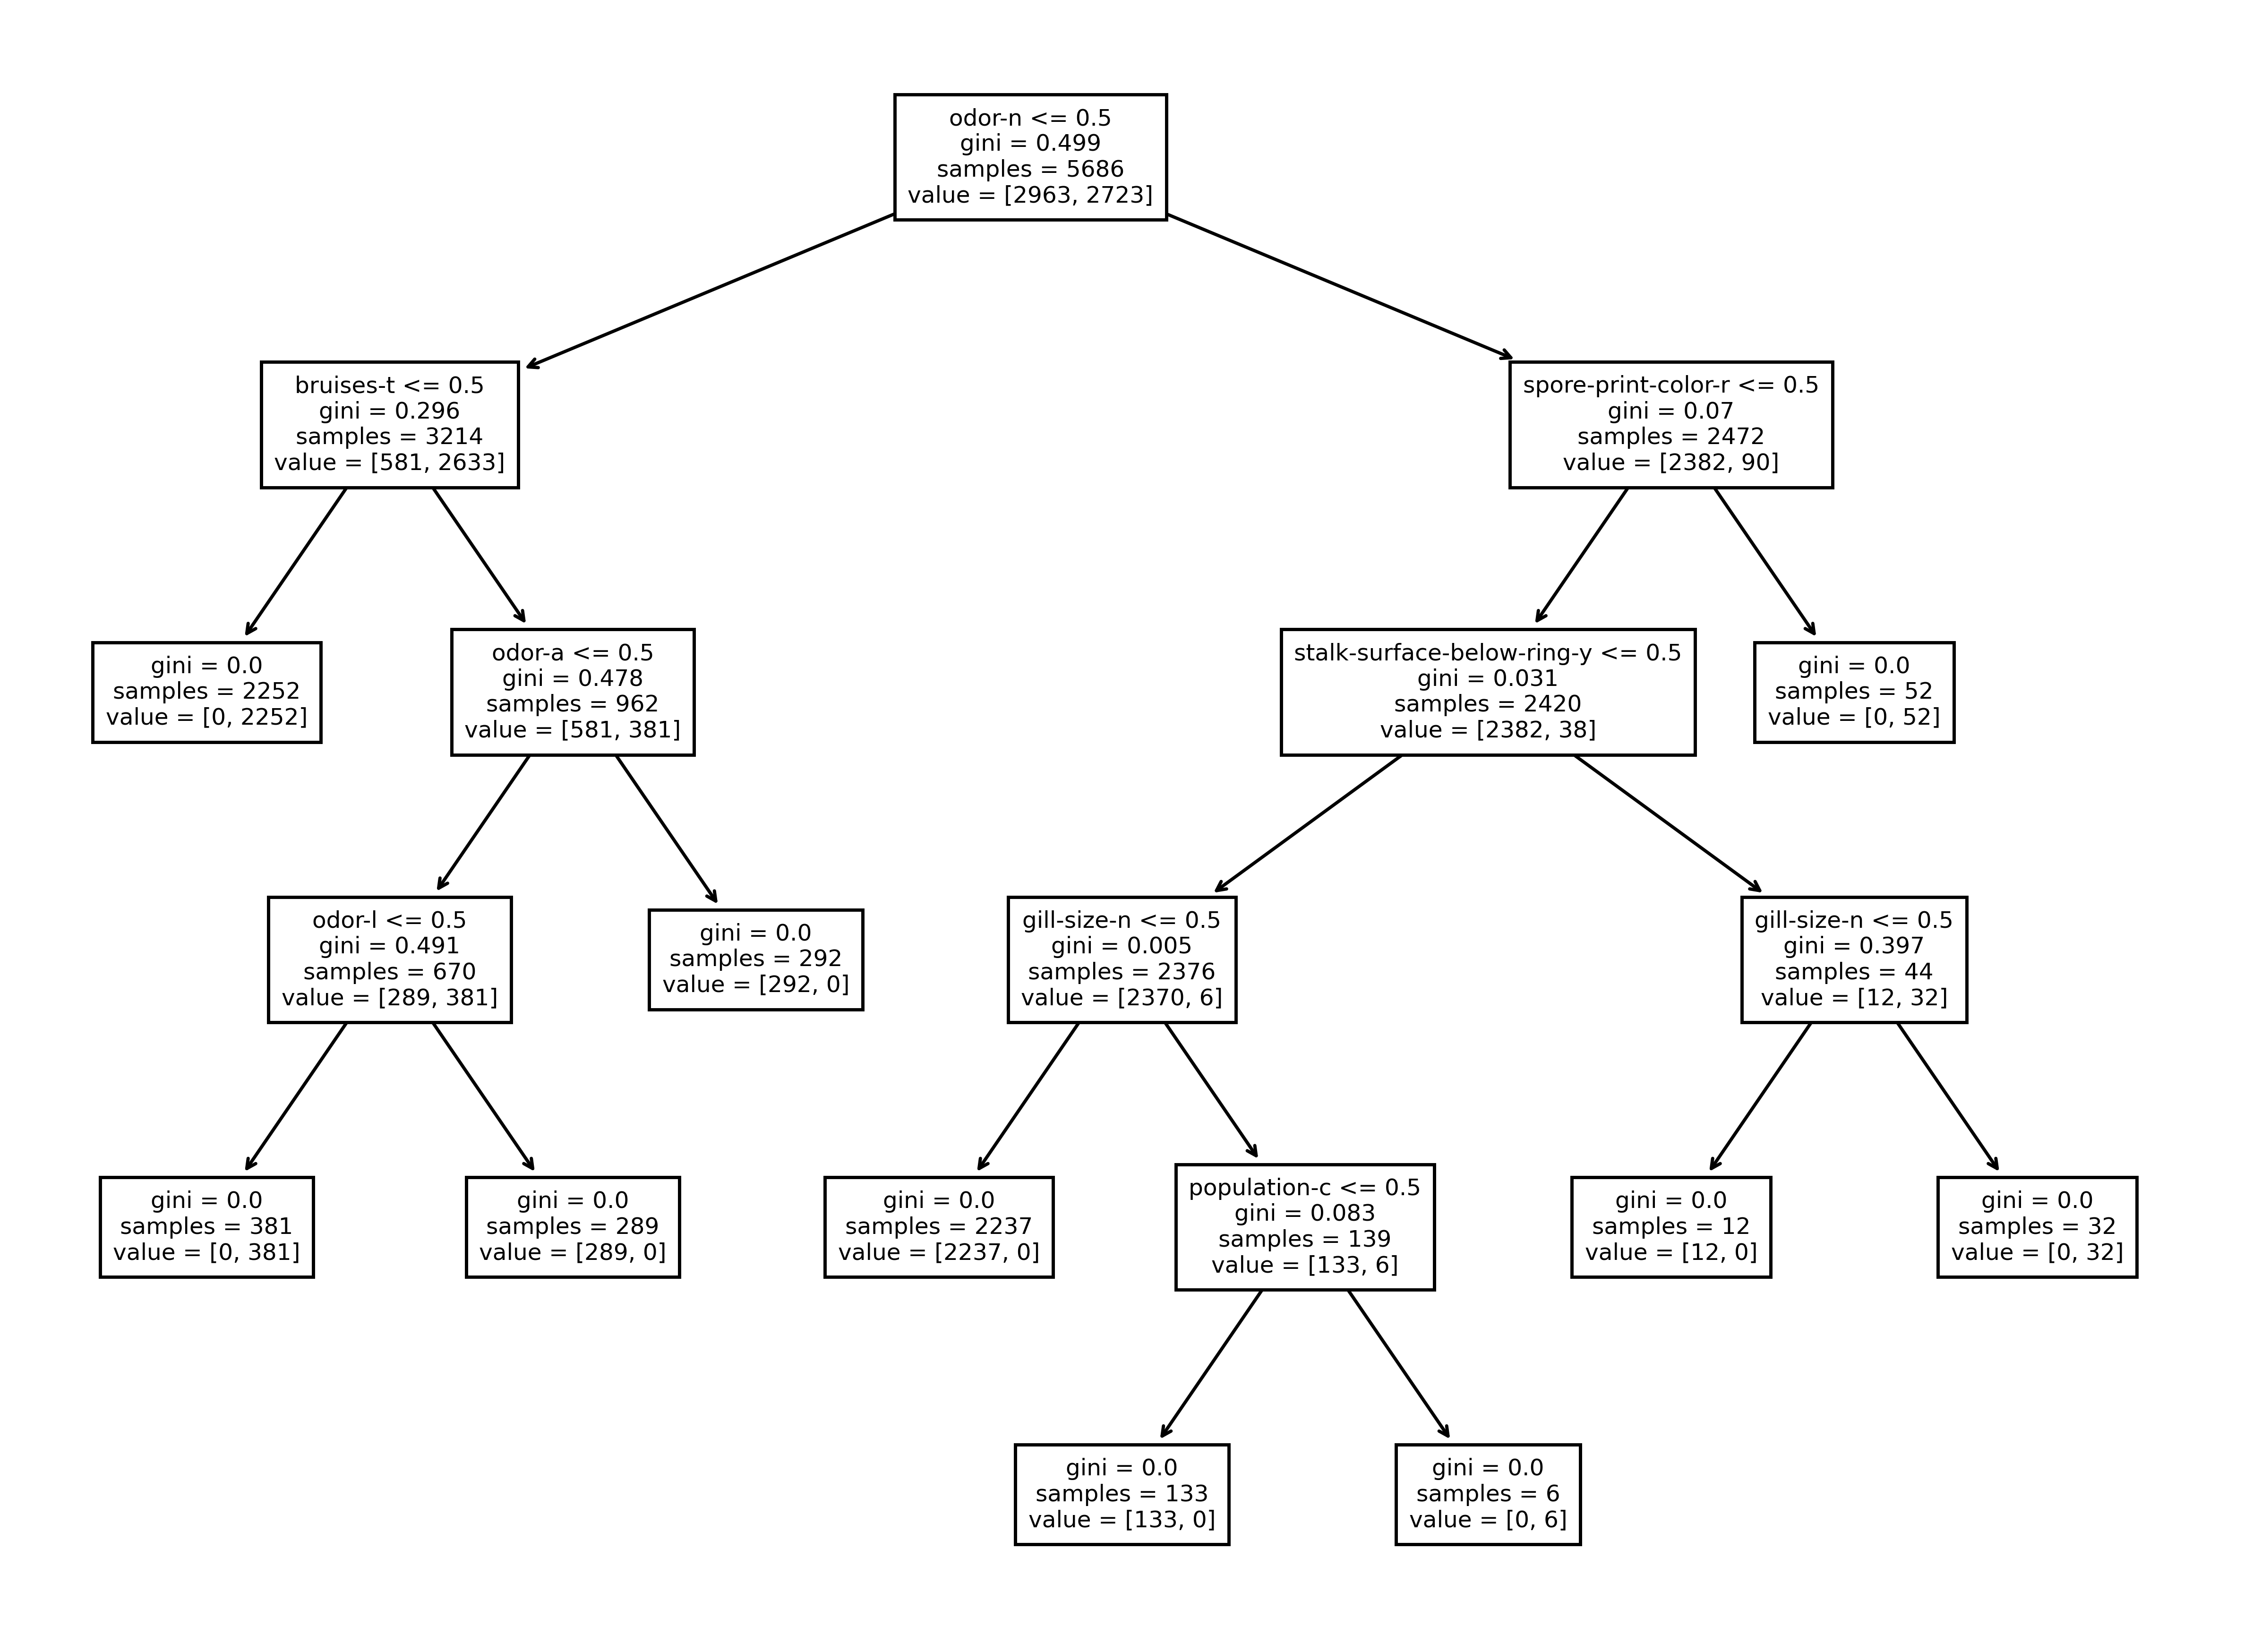

In [82]:
from sklearn import tree
fig, axes = plt.subplots(figsize = (12,9), dpi=500)
tree.plot_tree(final_model, feature_names = X_train.columns, fontsize=7)
plt.show()